### 문제


In [1]:
! # 시작시간 체크

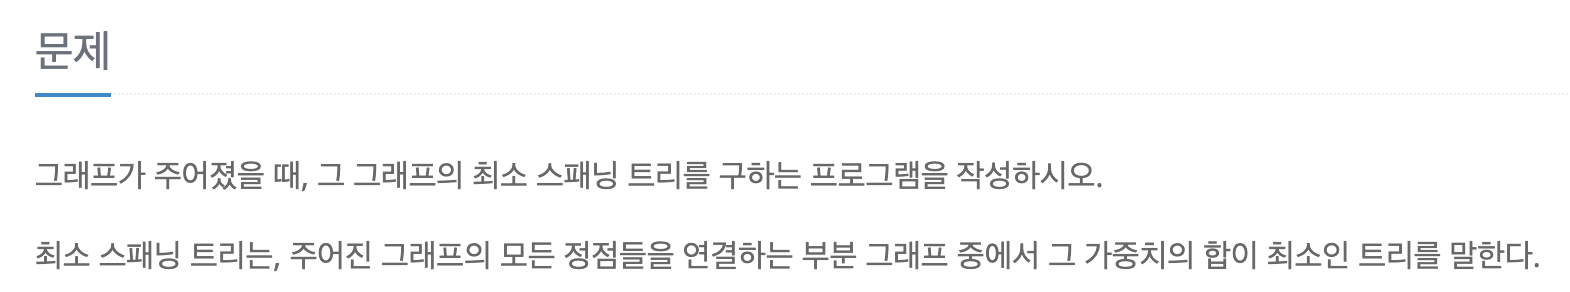

문제 요약

    첫줄에 V(정점 개수)와 E(간선 개수)가 주어집니다. 그 다음부터 E개의 줄에는 A, B, C가 주어집니다. A 정점과 B정점이 가중치 C인 간선으로 연결되어 있다는 의미입니다. 최소 스패닝 트리의 가중치를 출력하면 됩니다.

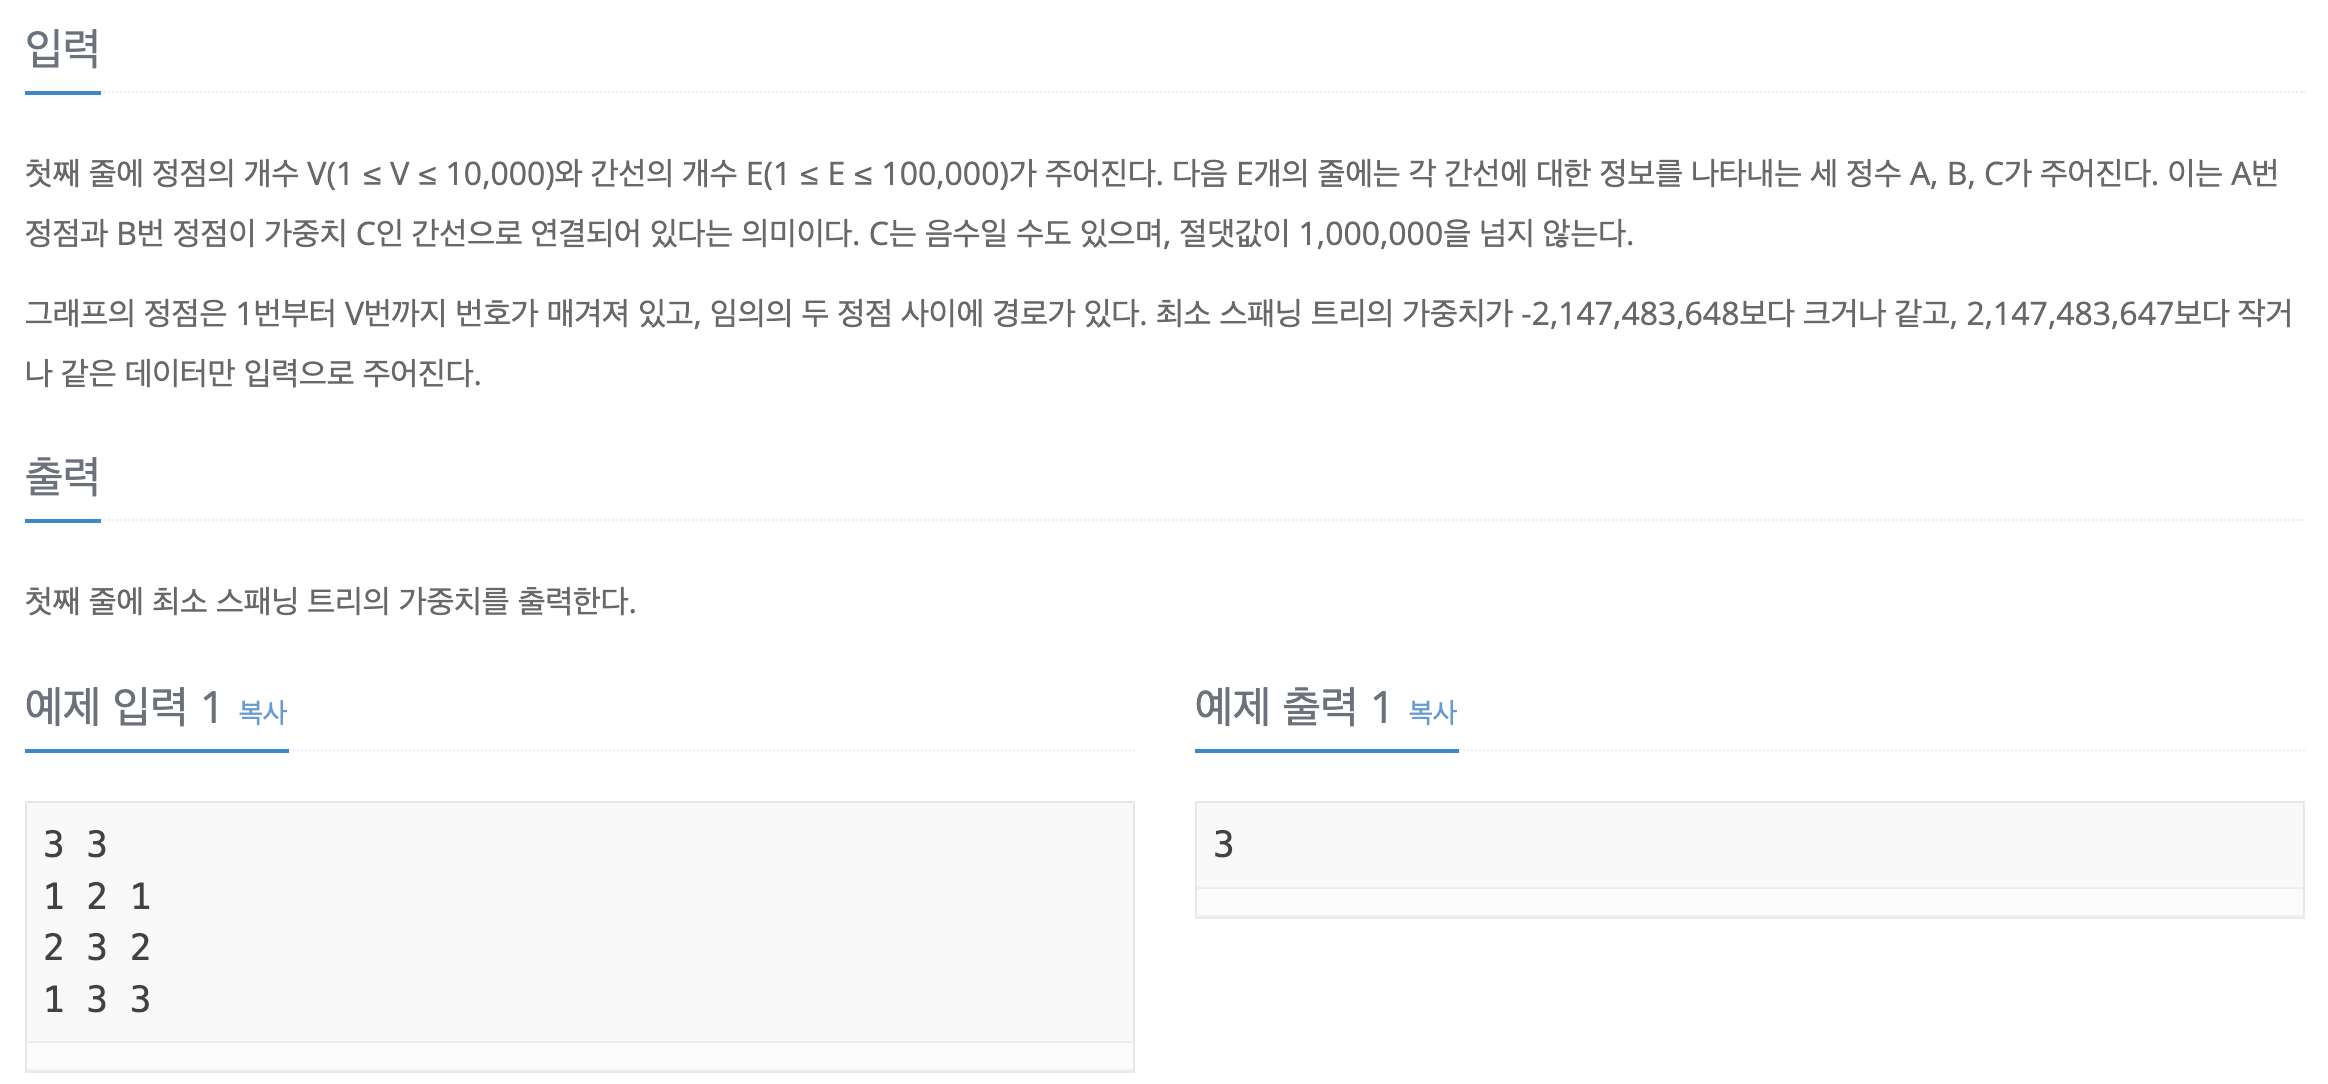

상상 코딩
    
    주어진 노드번호와 가중치를 입력받아, 인접행렬 이중 리스트를 생성한다.
    visited를 만들고, 한 점에서 다른점으로 연결된 간선을 모두 돌며 최소값을 찾고, visted에 체크하고,
    BFS와 같은 탐색방법인데, 한 노드에서 다른 노드로 이동할때 최소 간선을 선택하도록 하는 BFS 느낌

In [ ]:
! # 끝 시간 체크

### 풀이

In [9]:
import sys
input=sys.stdin.readline
V,E = map(int,input().split())
parent = list(range(V+1))
edges = [list(map(int,input().split())) for _ in range(E)]
edges.sort(key=lambda x:x[2])

def find(x):
    if x != parent[x]:
        parent[x] = find(parent[x])
    return parent[x]

result=0
for a,b,c in edges:
    a_root = find(a)
    b_root = find(b)
    if a_root != b_root:
        if a_root < b_root:
            parent[b_root] = a_root
        else:
            parent[a_root] = b_root
        result+=c
print(result)

3 3
1 2 1
2 3 2
1 3 3


### 주석 달린 풀이

In [ ]:
import sys
input=sys.stdin.readline
V,E = map(int,input().split())
parent = list(range(V+1))
edges = [list(map(int,input().split())) for _ in range(E)]
edges.sort(key=lambda x:x[2])

def find(x): # 특정 원소가 속한 집합을 찾기
    # 루트 노드를 찾을 때까지 재귀 호출 -> 루트 노드는 스스로가 스스로를 가리킨다!
    if x != parent[x]:
        parent[x] = find(parent[x])
    return parent[x]

result=0
for a,b,c in edges:
    a_root = find(a)
    b_root = find(b)
    if a_root != b_root: # 서로 가리키는 부모(루트)가 다르다면
        if a_root < b_root: # 번호가 더 작은 루트로 갱신
            parent[b_root] = a_root
        else:
            parent[a_root] = b_root
        result+=c
print(result)

### 연습

In [4]:
V, E = map(int, input().split())
Vroot = [i for i in range(V+1)]
Elist = []
for _ in range(E):
    Elist.append(list(map(int, input().split())))
Elist.sort(key=lambda x: x[2])

3 3
1 2 1
2 3 2
1 3 3


In [5]:
Vroot

[0, 1, 2, 3]

In [6]:
Elist

[[1, 2, 1], [2, 3, 2], [1, 3, 3]]

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find(x):
    # 루트 노드를 찾을 때까지 재귀 호출
    # 루트 노드는 스스로가 스스로를 가리킨다!
    if x != Vroot[x]:
        Vroot[x] = find(Vroot[x])
    return Vroot[x]

answer = 0
for s, e, w in Elist:
    sRoot = find(s)
    eRoot = find(e)
    if sRoot != eRoot:
        # 두 원소가 속한 집합 합치기
        if sRoot > eRoot:
            Vroot[sRoot] = eRoot
        else:
            Vroot[eRoot] = sRoot
        # 간선 갱신할 때마다, 가중치 더하기
        answer += w
print(answer)

In [ ]:
import sys
import heapq
input = sys.stdin.readline

v, e = map(int, input().split())
g = [[] for _ in range(v+1)]

for _ in range(e):
    a, b, w = map(int, input().split())
    g[a].append((w, b))
    g[b].append((w, a))


q = g[1] #1번 정점부터 시작
visited = [True, True] + [False]*(v-1)
heapq.heapify(q)
answer = 0
while q:
    w, dest = heapq.heappop(q)
    if not visited[dest]:
        visited[dest] = True
        answer += w
        for e in g[dest]:
            if not visited[e[1]]:
                heapq.heappush(q, e) #방문하지 않은 정점으로 연결되는 간선 추가

print(answer)